# Player Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [3]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

In [5]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,2,0,0,0,0,0,2,2,NaN,NaN


### Replacing DD with DC

In [6]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["batting_team"]=matches["batting_team"].replace(dicti)
matches["bowling_team"]=matches["bowling_team"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

## Taking in Consideration only SRH VS DC matches

In [7]:
SRH_DC=matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Sunrisers Hyderabad'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Sunrisers Hyderabad'))]
SRH_DC = SRH_DC[SRH_DC["dl_applied"]==0]

SRH_DC.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
4810,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,1,0,1,1,2,NaN,NaN
4811,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
4812,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,1,0,1,NaN,NaN
4813,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4814,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,1,0,1,NaN,NaN


In [8]:
SRH_DC.match_id.nunique()

14

In [9]:
SRH_DC.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

# Total Runs to be scored in the match

In [10]:
Each_team_overall_score = pd.DataFrame(SRH_DC.groupby("batting_team")["total_runs"].sum())

Each_team_overall_score.columns=["Total Runs"]

print('Overall score for each team :')
Each_team_overall_score

Overall score for each team :


,Total Runs
batting_team,
Delhi Capitals,2198
Sunrisers Hyderabad,2183


In [11]:
count = SRH_DC.match_id.nunique()

Total_runs_scored = SRH_DC.total_runs.sum()

Avg_score = Total_runs_scored/(count*2)

print("On an average runs scored in each innnings in SRH VS DC :",round(Avg_score))

On an average runs scored in each innnings in SRH VS DC : 156.0


In [12]:
runs_scored_per_match = pd.DataFrame(SRH_DC.groupby(["season","match_id"])["total_runs"].sum())

print("Total Runs scored in per match of SRH VS DC :")
runs_scored_per_match

Total Runs scored in per match of SRH VS DC :


total_runs
season match_id            
2013   394              229
       428              161
2014   469              364
2015   531              330
       561              320
2016   618              296
       628              319
2017   21               367
       39               374
2018   7929             336
       7935             383
2019   11152            276
       11321            285
       11413            341

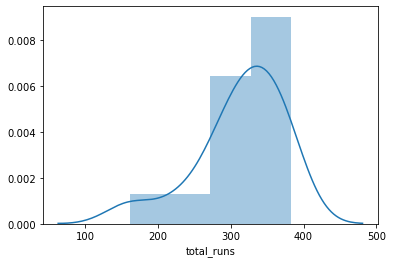

In [13]:
sns.distplot(runs_scored_per_match["total_runs"])

Text(0.5, 1.0, 'Total Runs')

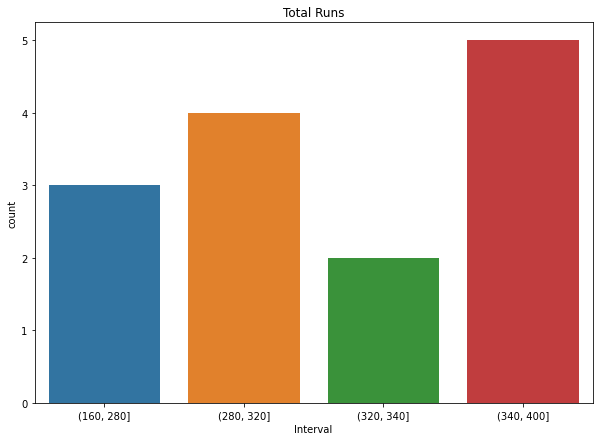

In [14]:
plt.figure(figsize=(10,7))
runs_scored_per_match["Interval"] = pd.cut(runs_scored_per_match["total_runs"],[160,280,320,340,400])
sns.countplot(runs_scored_per_match["Interval"])
plt.title("Total Runs")

In [15]:
print("Average of total runs scored in SRH VS DC matches :",round(runs_scored_per_match["total_runs"].mean()))

Average of total runs scored in SRH VS DC matches : 313


## Confidence Interval

In [16]:
runs_scored_per_match.describe().T

,count,mean,std,min,25%,50%,75%,max
total_runs,14.0,312.928571,61.033993,161.0,287.75,325.0,358.25,383.0


In [17]:
mean = runs_scored_per_match["total_runs"].mean()
sd = runs_scored_per_match["total_runs"].std()
n = len(runs_scored_per_match)

n

14

In [18]:
tstar = 2.064
se = sd/np.sqrt(n)
se

16.31202087779866

In [19]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for Total runs that can be scored in this match :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for Total runs that can be scored in this match :(279.0, 347.0)


From all the above analysis we can see that the frecuency of total score going more then 340 is little bit high and also the average score is around 320. So based on all the above analysis we can predict that today also the score is expected to go between 320-340.

## Player dismissal by caught out

In [20]:
caught = SRH_DC[(SRH_DC["dismissal_kind"]=="caught")|(SRH_DC["dismissal_kind"]=="caught and bowled")]

#### First Innings

In [21]:
first = caught[caught["inning"]==1]

In [22]:
first_wicket = pd.DataFrame(first.groupby(["match_id","batting_team"])["dismissal_kind"].count())

first_wicket.columns = ["1st inning caught out"]

first_wicket.reset_index(inplace = True)

print("1st inning wickets by getting caught out :")

first_wicket

1st inning wickets by getting caught out :


,match_id,batting_team,1st inning caught out
0,21,Sunrisers Hyderabad,3
1,39,Sunrisers Hyderabad,2
2,394,Delhi Capitals,7
3,428,Delhi Capitals,3
4,469,Sunrisers Hyderabad,1
5,531,Delhi Capitals,3
6,561,Sunrisers Hyderabad,4
7,618,Sunrisers Hyderabad,3
8,628,Sunrisers Hyderabad,3
9,7929,Delhi Capitals,2


- By team

In [23]:
team_wise = first_wicket.groupby(["batting_team"]).agg({"batting_team":"count","1st inning caught out":"sum"})

team_wise.columns = ["1st inning count","1st inning caught out"]

print("Team wise caught out in first innings :")
team_wise

Team wise caught out in first innings :


,1st inning count,1st inning caught out
batting_team,,
Delhi Capitals,7,29
Sunrisers Hyderabad,7,22


In [24]:
team_wise["per_match"] = round(team_wise["1st inning caught out"]/team_wise["1st inning count"])

print("Per match wise caught out for both the teams in first inning :")
team_wise

Per match wise caught out for both the teams in first inning :


,1st inning count,1st inning caught out,per_match
batting_team,,,
Delhi Capitals,7,29,4.0
Sunrisers Hyderabad,7,22,3.0


From here we can see that per match both the teams (while batting first) genreally lost 3-4 wickets by getting caught out.

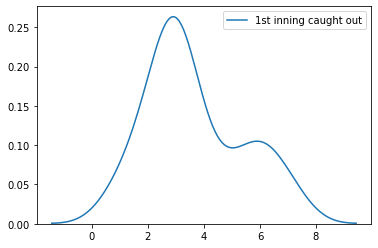

In [25]:
sns.kdeplot(first_wicket["1st inning caught out"])

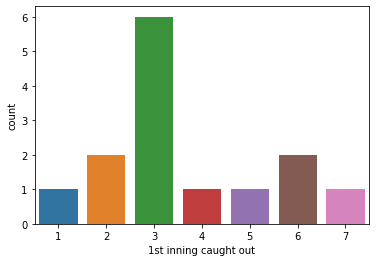

In [26]:
sns.countplot(first_wicket["1st inning caught out"])

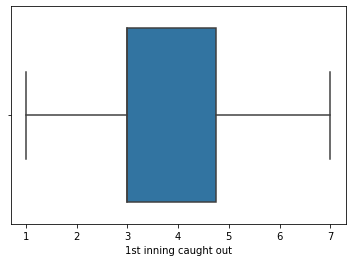

In [27]:
sns.boxplot(first_wicket["1st inning caught out"])

In [28]:
print("Average no of wickets that are expected to fall by getting caught out in first innings : {}".format(round(first_wicket["1st inning caught out"].mean())))

Average no of wickets that are expected to fall by getting caught out in first innings : 4


#### 2nd Innings

In [29]:
second = caught[caught["inning"]==2]

In [30]:
second_wicket = pd.DataFrame(second.groupby(["match_id","batting_team"])["dismissal_kind"].count())

second_wicket.columns = ["2nd inning caught out"]

second_wicket.reset_index(inplace = True)

print("2nd inning wickets by getting caught out :")

second_wicket

2nd inning wickets by getting caught out :


,match_id,batting_team,2nd inning caught out
0,21,Delhi Capitals,4
1,39,Delhi Capitals,3
2,394,Sunrisers Hyderabad,4
3,428,Sunrisers Hyderabad,2
4,469,Delhi Capitals,4
5,531,Sunrisers Hyderabad,4
6,561,Delhi Capitals,2
7,618,Delhi Capitals,2
8,628,Delhi Capitals,3
9,7929,Sunrisers Hyderabad,1


- By team

In [31]:
team_wise = second_wicket.groupby(["batting_team"]).agg({"batting_team":"count","2nd inning caught out":"sum"})

team_wise.columns = ["2nd inning count","2nd inning caught out"]

print("Team wise caught out in second innings :")
team_wise

Team wise caught out in second innings :


,2nd inning count,2nd inning caught out
batting_team,,
Delhi Capitals,7,23
Sunrisers Hyderabad,6,23


In [32]:
team_wise["per_match"] = round(team_wise["2nd inning caught out"]/team_wise["2nd inning count"])

print("Per match wise caught out for both the teams in second innings :")
team_wise

Per match wise caught out for both the teams in second innings :


,2nd inning count,2nd inning caught out,per_match
batting_team,,,
Delhi Capitals,7,23,3.0
Sunrisers Hyderabad,6,23,4.0


From here we can see that per match both the teams (while batting second) genreally lost 3-4 wickets by getting caught out.

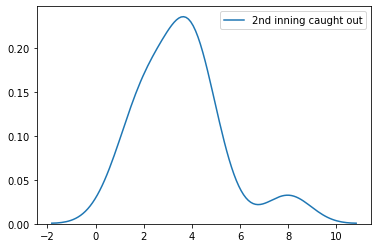

In [33]:
sns.kdeplot(second_wicket["2nd inning caught out"])

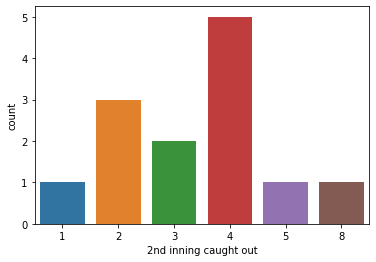

In [34]:
sns.countplot(second_wicket["2nd inning caught out"])

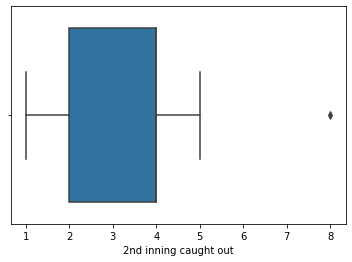

In [35]:
sns.boxplot(second_wicket["2nd inning caught out"])

In [36]:
print("Average no of wickets that are expected to fall by getting caught out in second innings : {}".format(round(second_wicket["2nd inning caught out"].mean())))

Average no of wickets that are expected to fall by getting caught out in second innings : 4


### Overall

In [37]:
overall = pd.DataFrame(caught.groupby(["match_id"])["dismissal_kind"].count())

overall.columns = ["caught out"]

print("Overall caught out match wise :")
overall

Overall caught out match wise :


,caught out
match_id,
21,7
39,5
394,11
428,5
469,5
531,7
561,6
618,5
628,6


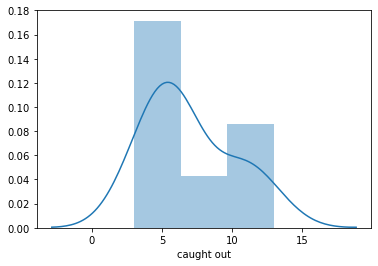

In [38]:
sns.distplot(overall["caught out"])

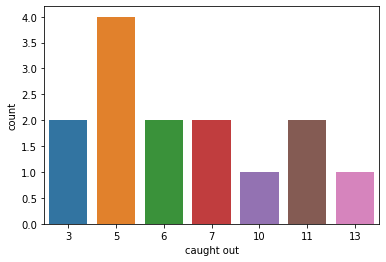

In [39]:
sns.countplot(overall["caught out"])

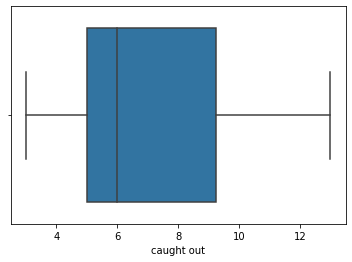

In [40]:
sns.boxplot(overall["caught out"])

In [41]:
print("Average no of wickets that are expected to fall by getting caught out in DC VS SRH matches : {}".format(round(overall["caught out"].mean())))

Average no of wickets that are expected to fall by getting caught out in DC VS SRH matches : 7


From all the above analysis of wickets fall by getting caught out , we can predict that 8-12 wickets are expected to fall in this match also in total.

## Runs SRH will score more/less in first 6 overs campared to DC

In [42]:
overs = SRH_DC[SRH_DC["over"]<=6]

overs.over.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

- DC first 6 overs runs

In [43]:
delhi = overs[overs["batting_team"]=="Delhi Capitals"]

delhi.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
4933,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN
4934,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,1,0,0,0,1,1,NaN,NaN
4935,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN
4936,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN
4937,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN


In [44]:
delhi_runs = delhi.groupby(["match_id","batting_team"]).agg({"total_runs":"sum"})

delhi_runs.columns = ["DC Total Runs"]

delhi_runs.reset_index(inplace = True)

print("Runs scored by DC overall :")

delhi_runs

Runs scored by DC overall :


,match_id,batting_team,DC Total Runs
0,21,Delhi Capitals,56
1,39,Delhi Capitals,62
2,394,Delhi Capitals,29
3,428,Delhi Capitals,26
4,469,Delhi Capitals,44
5,531,Delhi Capitals,40
6,561,Delhi Capitals,49
7,618,Delhi Capitals,50
8,628,Delhi Capitals,37
9,7929,Delhi Capitals,61


- SRH first 6 overs runs

In [45]:
sun = overs[overs["batting_team"]=="Sunrisers Hyderabad"]

sun

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
4810,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,1,0,1,1,2,NaN,NaN
4811,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
4812,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,1,0,1,NaN,NaN
4813,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4814,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,1,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178370,11413,2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,0,Delhi Capitals,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
178371,11413,2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,0,Delhi Capitals,1,Sunrisers Hyderabad,...,0,0,0,0,0,1,0,1,NaN,NaN
178372,11413,2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,0,Delhi Capitals,1,Sunrisers Hyderabad,...,0,0,0,0,0,1,0,1,NaN,NaN
178373,11413,2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,0,Delhi Capitals,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN


In [46]:
sun_runs = sun.groupby(["match_id"]).agg({"total_runs":"sum"})

sun_runs.columns = ["SRH Total Runs"]

sun_runs.reset_index(inplace = True)

print("Runs scored by SRH overall :")

sun_runs

Runs scored by SRH overall :


,match_id,SRH Total Runs
0,21,39
1,39,66
2,394,38
3,428,41
4,469,55
5,531,50
6,561,41
7,618,51
8,628,46
9,7929,64


In [47]:
final = pd.merge(delhi_runs,sun_runs,on = "match_id",how = "inner")

final

,match_id,batting_team,DC Total Runs,SRH Total Runs
0,21,Delhi Capitals,56,39
1,39,Delhi Capitals,62,66
2,394,Delhi Capitals,29,38
3,428,Delhi Capitals,26,41
4,469,Delhi Capitals,44,55
5,531,Delhi Capitals,40,50
6,561,Delhi Capitals,49,41
7,618,Delhi Capitals,50,51
8,628,Delhi Capitals,37,46
9,7929,Delhi Capitals,61,64


In [48]:
final["DIFF"] = abs(final["DC Total Runs"]-final["SRH Total Runs"])

final

,match_id,batting_team,DC Total Runs,SRH Total Runs,DIFF
0,21,Delhi Capitals,56,39,17
1,39,Delhi Capitals,62,66,4
2,394,Delhi Capitals,29,38,9
3,428,Delhi Capitals,26,41,15
4,469,Delhi Capitals,44,55,11
5,531,Delhi Capitals,40,50,10
6,561,Delhi Capitals,49,41,8
7,618,Delhi Capitals,50,51,1
8,628,Delhi Capitals,37,46,9
9,7929,Delhi Capitals,61,64,3


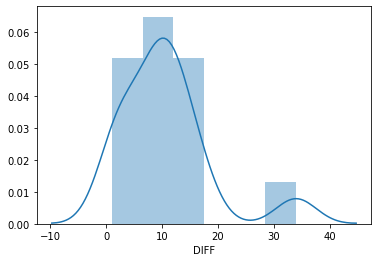

In [49]:
sns.distplot(final["DIFF"])

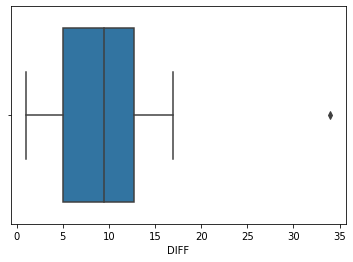

In [50]:
sns.boxplot(final["DIFF"])

We can see presence of outlier. We will remove it since already we have less sample size and the outlier value is quite large as campared to other values. So it's better to remove it.

### Outlier Removal

In [51]:
final['z_score']=stats.zscore(final["DIFF"])

final

,match_id,batting_team,DC Total Runs,SRH Total Runs,DIFF,z_score
0,21,Delhi Capitals,56,39,17,0.803828
1,39,Delhi Capitals,62,66,4,-0.821691
2,394,Delhi Capitals,29,38,9,-0.196491
3,428,Delhi Capitals,26,41,15,0.553748
4,469,Delhi Capitals,44,55,11,0.053589
5,531,Delhi Capitals,40,50,10,-0.071451
6,561,Delhi Capitals,49,41,8,-0.321531
7,618,Delhi Capitals,50,51,1,-1.196810
8,628,Delhi Capitals,37,46,9,-0.196491
9,7929,Delhi Capitals,61,64,3,-0.946731


In [52]:
final = final.loc[final['z_score'].abs()<=2]

final = final.drop(["z_score"],axis = 1)

final

,match_id,batting_team,DC Total Runs,SRH Total Runs,DIFF
0,21,Delhi Capitals,56,39,17
1,39,Delhi Capitals,62,66,4
2,394,Delhi Capitals,29,38,9
3,428,Delhi Capitals,26,41,15
4,469,Delhi Capitals,44,55,11
5,531,Delhi Capitals,40,50,10
6,561,Delhi Capitals,49,41,8
7,618,Delhi Capitals,50,51,1
8,628,Delhi Capitals,37,46,9
9,7929,Delhi Capitals,61,64,3


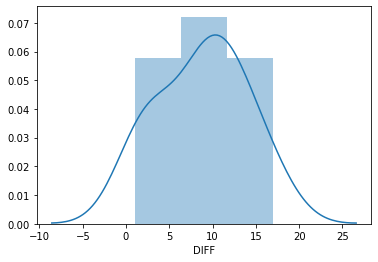

In [53]:
sns.distplot(final["DIFF"])

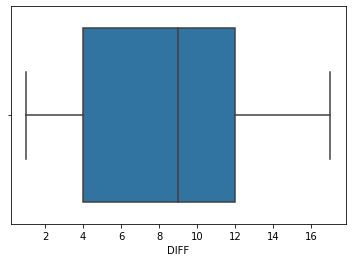

In [54]:
sns.boxplot(final["DIFF"])

In [55]:
print("Average difference of runs scored in first 6 overs :{}".format(round(final["DIFF"].mean())))

Average difference of runs scored in first 6 overs :9


## Confidence Interval 

In [56]:
final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
DIFF,13.0,8.769231,5.035769,1.0,4.0,9.0,12.0,17.0


In [57]:
mean = final["DIFF"].mean()
sd = final["DIFF"].std()
n = len(final)

n

13

In [58]:
tstar = 2.064
se = sd/np.sqrt(n)
se

1.3966711621944945

In [59]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)


print("95% Confidence Interval for difference between score of SRH and RR in first 6 overs :{}".format((lcb, ucb)))

95% Confidence Interval for difference between score of SRH and RR in first 6 overs :(6.0, 12.0)


From all the above analysis we can predict that between 6-14 runs difference is expected between the first 6 over runs of both the teams.

## Extras that can be bowled

In [60]:
extras = SRH_DC[SRH_DC["extra_runs"]>0]

extras.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
4810,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,1,0,1,1,2,NaN,NaN
4848,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,1,0,0,0,0,0,1,1,NaN,NaN
4874,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,1,0,0,0,1,1,NaN,NaN
4888,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,1,0,0,1,1,NaN,NaN
4934,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,1,0,0,0,1,1,NaN,NaN


In [61]:
extras.extra_runs.unique()

array([1, 4, 3, 2, 5], dtype=int64)

#### First Innings

In [62]:
first_innings_extras = extras[extras["inning"]==1]

In [63]:
first_extras = first_innings_extras.groupby(["match_id","bowling_team"]).agg({"wide_runs":"sum","noball_runs":"sum","bye_runs":"sum","legbye_runs":"sum","penalty_runs":"sum"})

first_extras.columns = ["wide","noball","bye","legbye","penalty"]

first_extras

,,wide,noball,bye,legbye,penalty
match_id,bowling_team,,,,,
21,Delhi Capitals,1,2,0,1,0
39,Delhi Capitals,2,1,0,5,0
394,Sunrisers Hyderabad,4,1,0,2,0
428,Sunrisers Hyderabad,3,1,1,1,0
469,Delhi Capitals,2,0,0,3,0
531,Sunrisers Hyderabad,6,0,1,2,0
561,Delhi Capitals,3,0,0,1,0
618,Delhi Capitals,3,2,0,6,0
628,Delhi Capitals,1,0,1,1,0


In [64]:
first_extras["total extras"] = first_extras["wide"] + first_extras["noball"] + first_extras["bye"] + first_extras["legbye"] + first_extras["penalty"]

first_extras.reset_index(inplace = True)

first_extras

,match_id,bowling_team,wide,noball,bye,legbye,penalty,total extras
0,21,Delhi Capitals,1,2,0,1,0,4
1,39,Delhi Capitals,2,1,0,5,0,8
2,394,Sunrisers Hyderabad,4,1,0,2,0,7
3,428,Sunrisers Hyderabad,3,1,1,1,0,6
4,469,Delhi Capitals,2,0,0,3,0,5
5,531,Sunrisers Hyderabad,6,0,1,2,0,9
6,561,Delhi Capitals,3,0,0,1,0,4
7,618,Delhi Capitals,3,2,0,6,0,11
8,628,Delhi Capitals,1,0,1,1,0,3
9,7929,Sunrisers Hyderabad,2,0,0,1,0,3


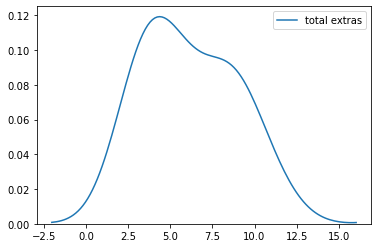

In [65]:
sns.kdeplot(first_extras["total extras"])

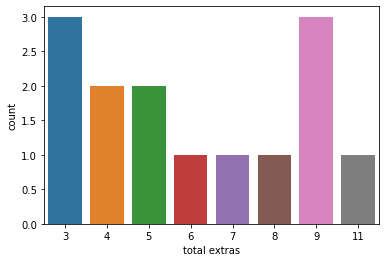

In [66]:
sns.countplot(first_extras["total extras"])

In [67]:
print("Average no of extras given in first innings : {}".format(round(first_extras["total extras"].mean())))

Average no of extras given in first innings : 6


- Team wise

In [68]:
team_extra = first_extras.groupby(["bowling_team"]).agg({"bowling_team":"count","total extras":"sum"})

team_extra.columns = ["1st inning count","extras given"]

print("Team wise extras given in first innings :")
team_extra

Team wise extras given in first innings :


,1st inning count,extras given
bowling_team,,
Delhi Capitals,7,44
Sunrisers Hyderabad,7,42


In [69]:
team_extra["per_match"] = round(team_extra["extras given"]/team_extra["1st inning count"])

print("Per match wise extras given by both the teams :")
team_extra

Per match wise extras given by both the teams :


,1st inning count,extras given,per_match
bowling_team,,,
Delhi Capitals,7,44,6.0
Sunrisers Hyderabad,7,42,6.0


From the above dataframe we can see that both the teams have given almost equal no of extras while bowling in 1st inning.

#### Second Inning

In [70]:
second_innings_extras = extras[extras["inning"]==2]

In [71]:
second_extras = second_innings_extras.groupby(["match_id","bowling_team"]).agg({"wide_runs":"sum","noball_runs":"sum","bye_runs":"sum","legbye_runs":"sum","penalty_runs":"sum"})

second_extras.columns = ["wide","noball","bye","legbye","penalty"]

second_extras

,,wide,noball,bye,legbye,penalty
match_id,bowling_team,,,,,
21,Sunrisers Hyderabad,2,0,3,2,0
39,Sunrisers Hyderabad,2,0,0,1,0
394,Delhi Capitals,1,1,0,1,0
428,Delhi Capitals,3,0,0,0,0
469,Sunrisers Hyderabad,2,1,0,3,0
531,Delhi Capitals,1,0,2,1,0
561,Sunrisers Hyderabad,1,0,0,3,0
618,Sunrisers Hyderabad,3,0,0,0,0
628,Sunrisers Hyderabad,10,0,0,4,0


In [72]:
second_extras["total extras"] = second_extras["wide"] + second_extras["noball"] + second_extras["bye"] + second_extras["legbye"] + second_extras["penalty"]

second_extras.reset_index(inplace = True)

second_extras

,match_id,bowling_team,wide,noball,bye,legbye,penalty,total extras
0,21,Sunrisers Hyderabad,2,0,3,2,0,7
1,39,Sunrisers Hyderabad,2,0,0,1,0,3
2,394,Delhi Capitals,1,1,0,1,0,3
3,428,Delhi Capitals,3,0,0,0,0,3
4,469,Sunrisers Hyderabad,2,1,0,3,0,6
5,531,Delhi Capitals,1,0,2,1,0,4
6,561,Sunrisers Hyderabad,1,0,0,3,0,4
7,618,Sunrisers Hyderabad,3,0,0,0,0,3
8,628,Sunrisers Hyderabad,10,0,0,4,0,14
9,7929,Delhi Capitals,5,1,0,0,0,6


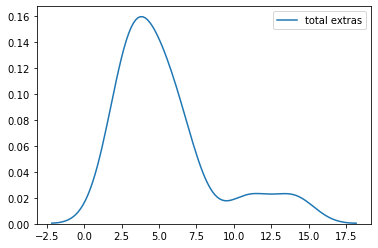

In [73]:
sns.kdeplot(second_extras["total extras"])

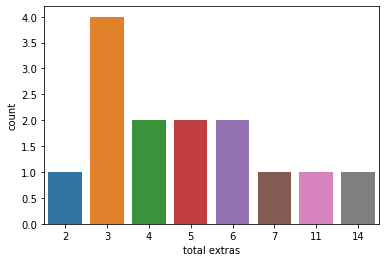

In [74]:
sns.countplot(second_extras["total extras"])

In [75]:
print("Average no of extras given in second innings : {}".format(round(second_extras["total extras"].mean())))

Average no of extras given in second innings : 5


- Teamwise

In [76]:
team_extra = second_extras.groupby(["bowling_team"]).agg({"bowling_team":"count","total extras":"sum"})

team_extra.columns = ["1st inning count","extras given"]

print("Team wise extras given in second innings :")
team_extra

Team wise extras given in second innings :


,1st inning count,extras given
bowling_team,,
Delhi Capitals,7,34
Sunrisers Hyderabad,7,42


In [77]:
team_extra["per_match"] = round(team_extra["extras given"]/team_extra["1st inning count"])

print("Per match wise extras given by both the teams :")
team_extra

Per match wise extras given by both the teams :


,1st inning count,extras given,per_match
bowling_team,,,
Delhi Capitals,7,34,5.0
Sunrisers Hyderabad,7,42,6.0


From the above dataframe we can see that both the teams have given almost equal no. of extras while bowling in 2nd innings also.

### Overall

In [78]:
extras_overall = extras.groupby(["match_id"]).agg({"wide_runs":"sum","noball_runs":"sum","bye_runs":"sum","legbye_runs":"sum","penalty_runs":"sum"})

extras_overall.columns = ["wide","noball","bye","legbye","penalty"]

extras_overall

,wide,noball,bye,legbye,penalty
match_id,,,,,
21,3,2,3,3,0
39,4,1,0,6,0
394,5,2,0,3,0
428,6,1,1,1,0
469,4,1,0,6,0
531,7,0,3,3,0
561,4,0,0,4,0
618,6,2,0,6,0
628,11,0,1,5,0


In [79]:
extras_overall["total extras"] = extras_overall["wide"] + extras_overall["noball"] + extras_overall["bye"] + extras_overall["legbye"] + extras_overall["penalty"]

extras_overall.reset_index(inplace = True)

extras_overall

,match_id,wide,noball,bye,legbye,penalty,total extras
0,21,3,2,3,3,0,11
1,39,4,1,0,6,0,11
2,394,5,2,0,3,0,10
3,428,6,1,1,1,0,9
4,469,4,1,0,6,0,11
5,531,7,0,3,3,0,13
6,561,4,0,0,4,0,8
7,618,6,2,0,6,0,14
8,628,11,0,1,5,0,17
9,7929,7,1,0,1,0,9


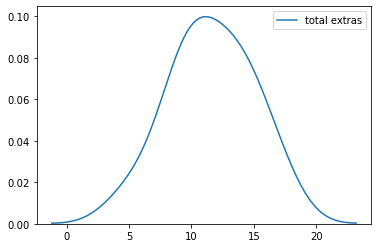

In [80]:
sns.kdeplot(extras_overall["total extras"])

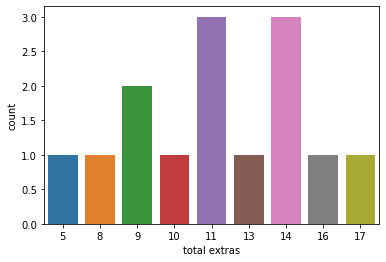

In [81]:
sns.countplot(extras_overall["total extras"])

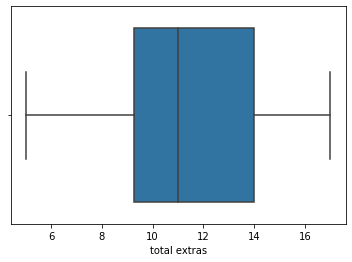

In [82]:
sns.boxplot(extras_overall["total extras"])

In [83]:
print("Average no of extras given in SRH VS DC : {}".format(round(extras_overall["total extras"].mean())))

Average no of extras given in SRH VS DC : 12


## Confidence Interval

In [84]:
extras_overall.describe().iloc[:,6:].T

,count,mean,std,min,25%,50%,75%,max
total extras,14.0,11.571429,3.298351,5.0,9.25,11.0,14.0,17.0


In [85]:
mean = extras_overall["total extras"].mean()
sd = extras_overall["total extras"].std()
n = len(extras_overall)

n

14

In [86]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.8815214477222596

In [87]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)


print("Confidence Interval for the extras that can be given in SRH VS DC match :{}".format((lcb, ucb)))

Confidence Interval for the extras that can be given in SRH VS DC match :(10.0, 13.0)


From all the above analysis overall and innings wise and also taking in consideration present scenerio we can predict that 9-12 extras are expected to be bowled in total in this match.